# Лабораторная работа №3

# Метрические методы классификации

In [1]:
import pandas as pd
import numpy as np

data_source = 'mine-dataset.data.csv'
d = pd.read_table(data_source, delimiter=',',
                  header=None, names=['voltage', 'high', 'soil', 'answer'],
                  keep_default_na=False)
d.head()

,voltage,high,soil,answer
0,0.338157,0.000000,0.0,NULL
1,0.320241,0.181818,0.0,NULL
2,0.287009,0.272727,0.0,NULL
3,0.256284,0.454545,0.0,NULL
4,0.262840,0.545455,0.0,NULL


In [2]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   voltage  337 non-null    float64
 1   high     337 non-null    float64
 2   soil     337 non-null    float64
 3   answer   337 non-null    object 
dtypes: float64(3), object(1)
memory usage: 10.7+ KB


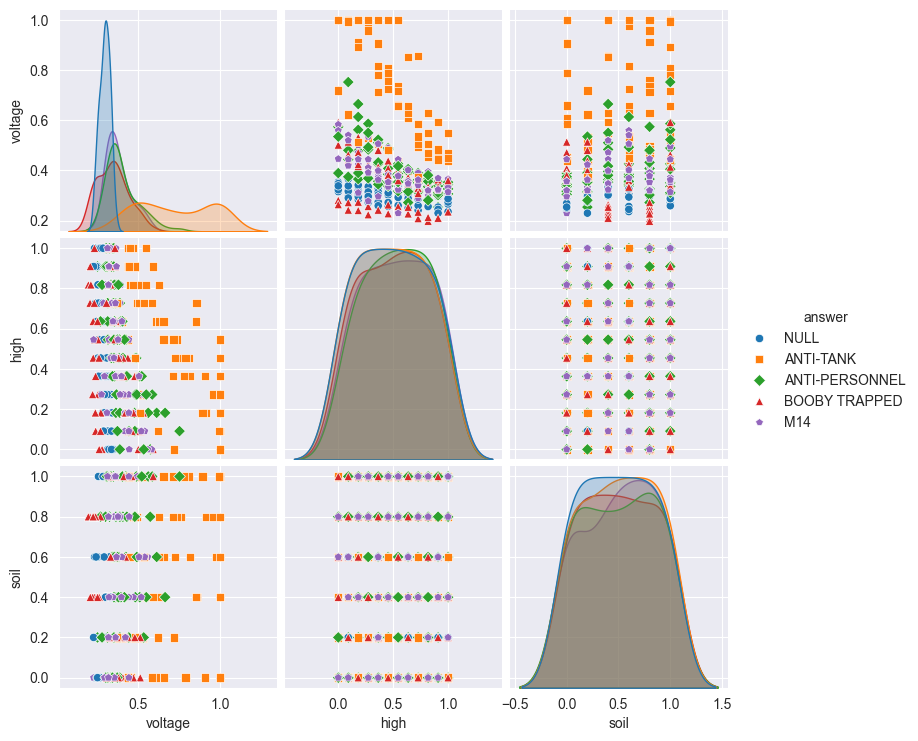

In [3]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer', markers=["o", "s", "D", '^', 'p']);

In [4]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['voltage', 'high', 'soil']]
y_train = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train.values, y_train)

# Использование классификатора
# Объявление признаков объекта
# одно из значений вырезано из выборки для проверки: 0.3957699334,0.2727272727,0.2,ANTI-PERSONNEL
X_test = np.array([[0.3957699334,0.2727272727,0.2]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)

['ANTI-PERSONNEL']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    d.iloc[ :, 0:3 ],
    d['answer'],
    test_size=0.3,
    random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.4019607843137255


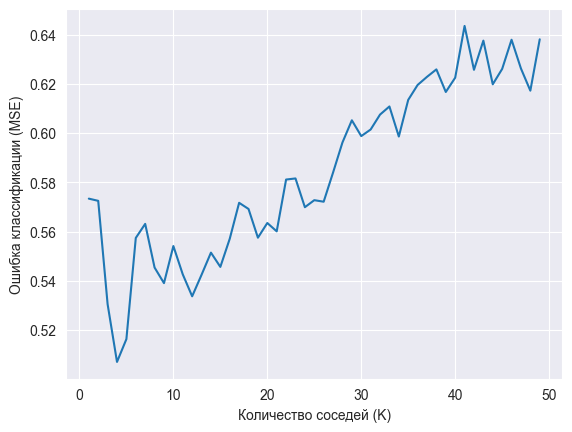

Оптимальные значения K:  [4]


In [6]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:3 ], d['answer'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

C:\Users\md\AppData\Local\Temp\ipykernel_1120\3416685019.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\md\AppData\Local\Temp\ipykernel_1120\3416685019.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
C:\Users\md\AppData\Local\Temp\ipykernel_1120\3416685019.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, y

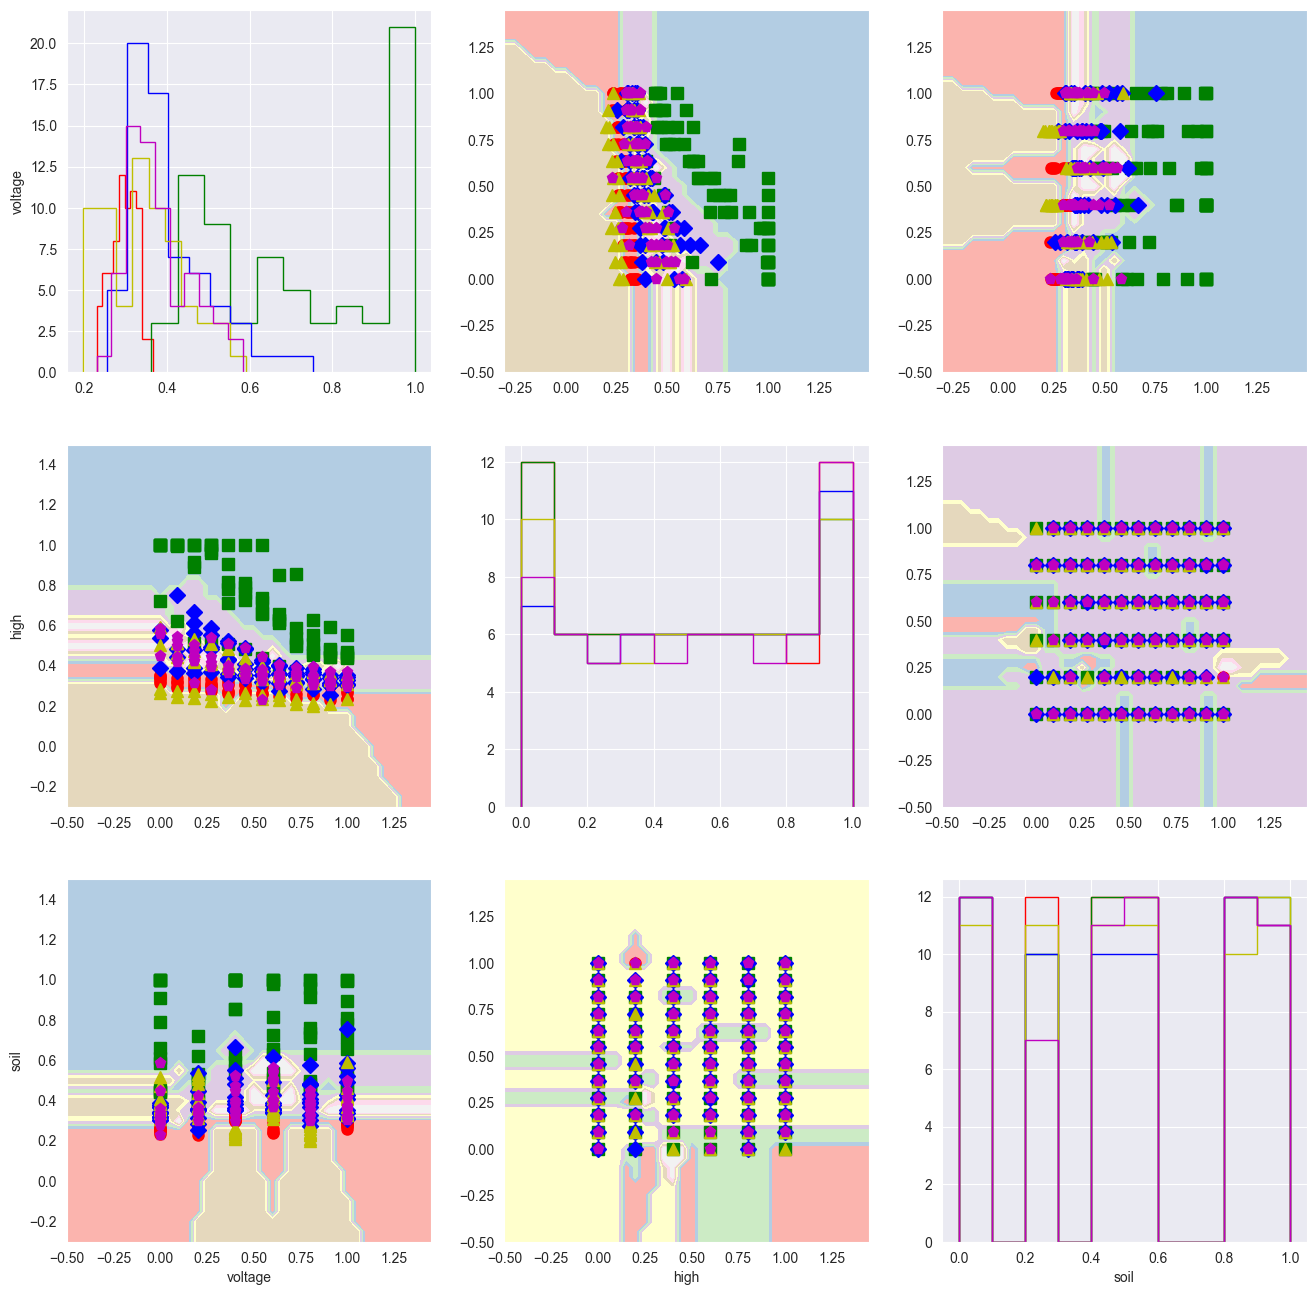

In [7]:
dX = d.iloc[:,0:3]
dy = d['answer']

# "o", "s", "D", '^', 'p'
plot_markers = ['ro', 'gs', 'bD', 'y^', 'mp']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.05

# Обходим все subplot
for i in range(0,3):
    for j in range(0,3):

        # Строим решающие границы
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=4)
            model.fit(dX.iloc[:, [i,j]].values, dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            p[p==answers[3]] = 3
            p[p==answers[4]] = 4
            p=p.astype('int32')
            places[i,j].contourf(xx, yy, p, cmap='Pastel1')

        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                  histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=8)

        if j==0:
            places[i, j].set_ylabel(dX.columns[i])

        if i==2:
            places[i, j].set_xlabel(dX.columns[j])